In [1]:
import torch
from torch.autograd import Variable
# from torchvision.models import resnet18, vgg16, resnet34, resnet50
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
import os
import torchvision
import scipy.ndimage as nd
import torch.nn as nn
import torchvision.models as models
import torch.utils.model_zoo as model_zoo
from util import showtensor
from resnet import resnet50
from deepdream import make_step

%matplotlib inline

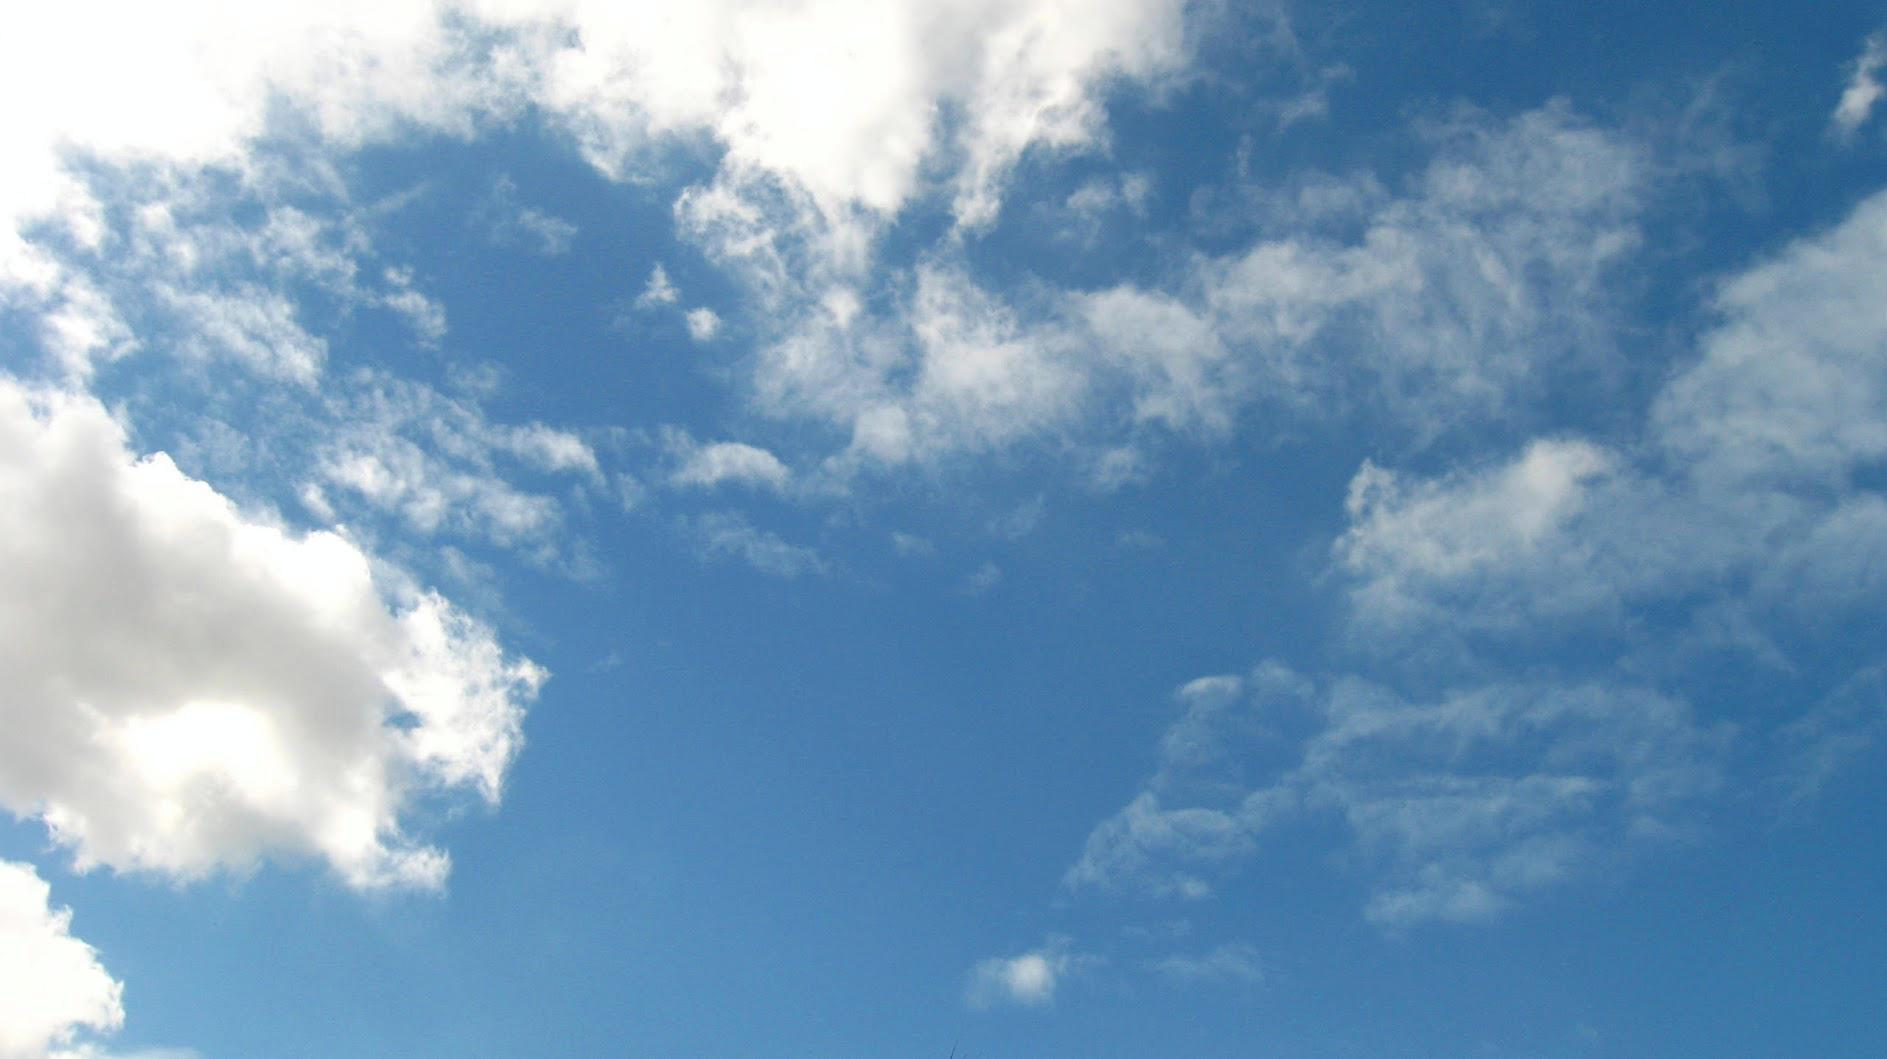

In [2]:
# load the data
transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
dset = datasets.ImageFolder(os.path.join('./data/'), transforms)
dset_loader = torch.utils.data.DataLoader(dset, batch_size=1)
inputs, classes = next(iter(dset_loader))
input_np = inputs.numpy()
showtensor(input_np)

In [3]:
model = resnet50(pretrained=True)
model.cuda()
for param in model.parameters():
    param.require_grads = False

/usr/share/Anaconda2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
/usr/share/Anaconda2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:571: RuntimeWarning: invalid value encountered in true_divide
  zoom = (numpy.array(input.shape) - 1) / zoom_div


(1, 3, 197, 351)
3


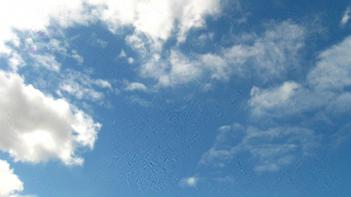

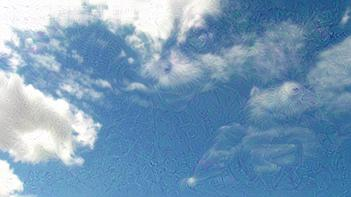

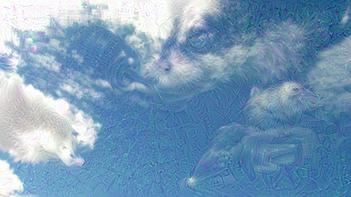

(1, 3, 276, 491)
3


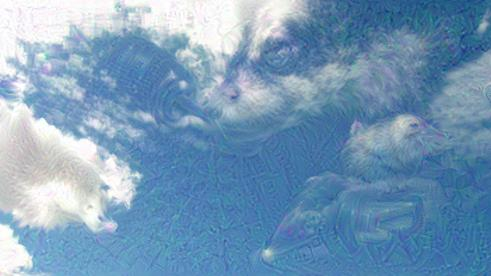

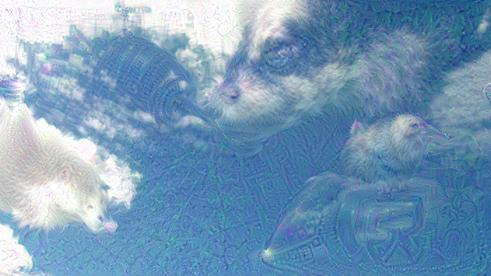

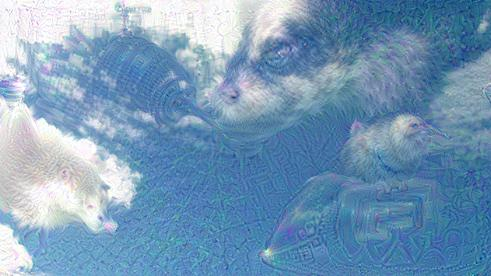

(1, 3, 386, 688)
3


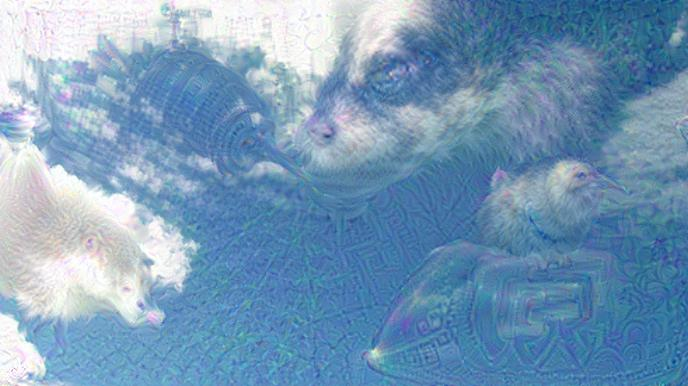

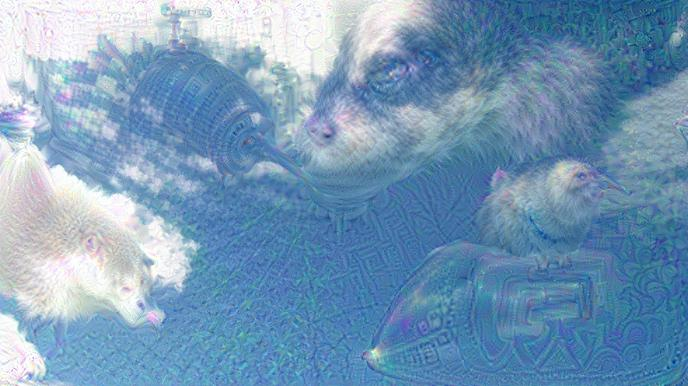

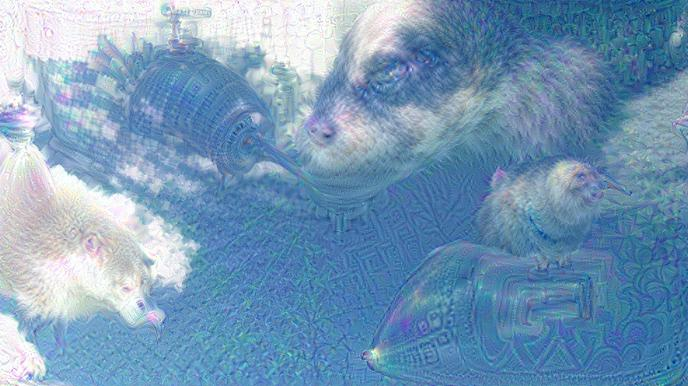

(1, 3, 540, 963)
3


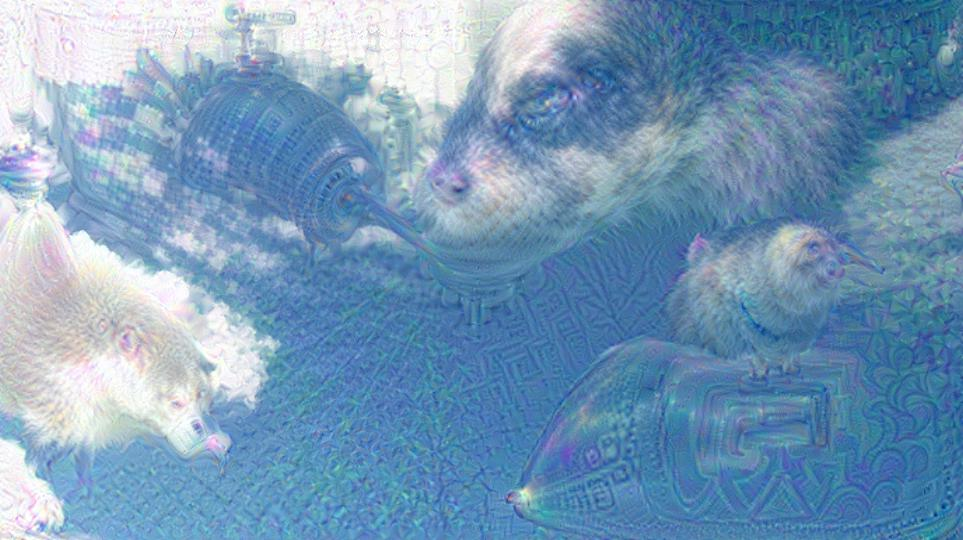

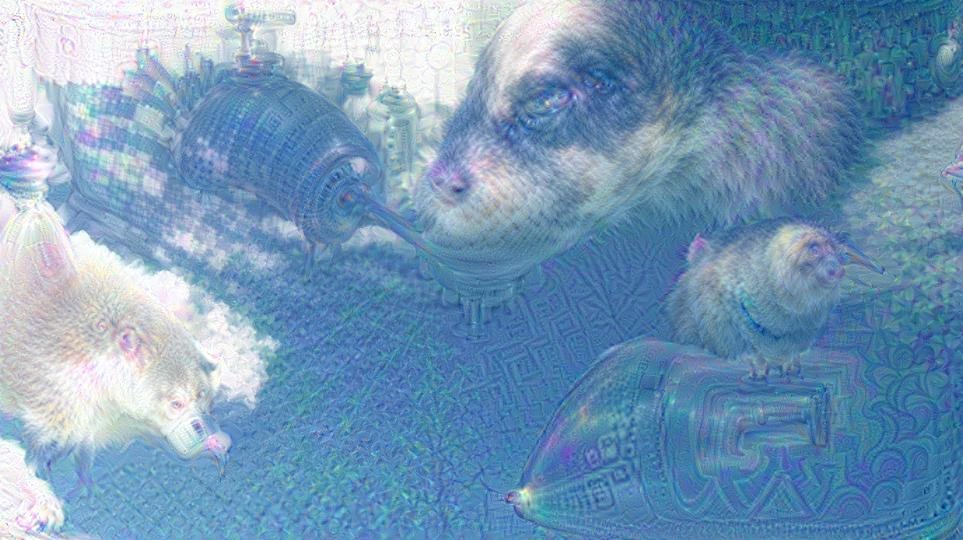

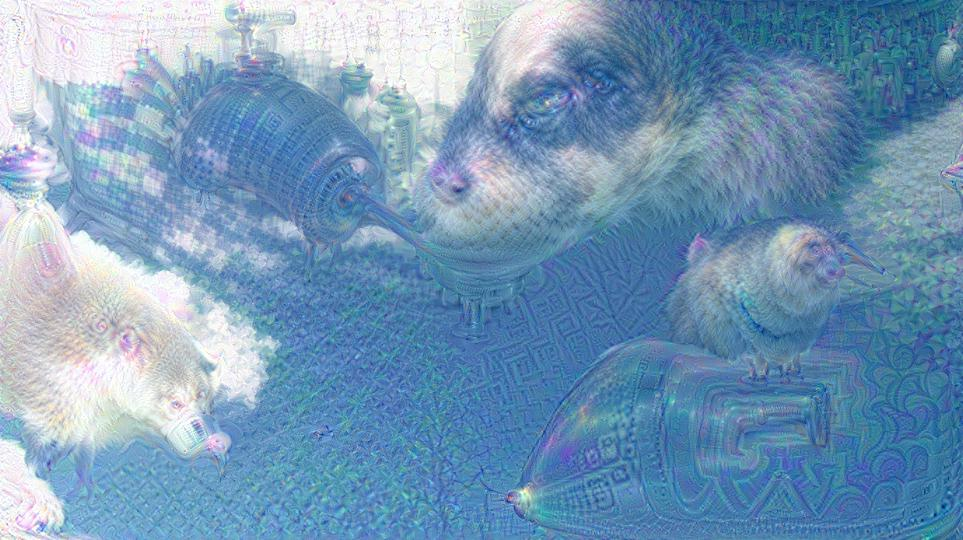

(1, 3, 756, 1348)
3


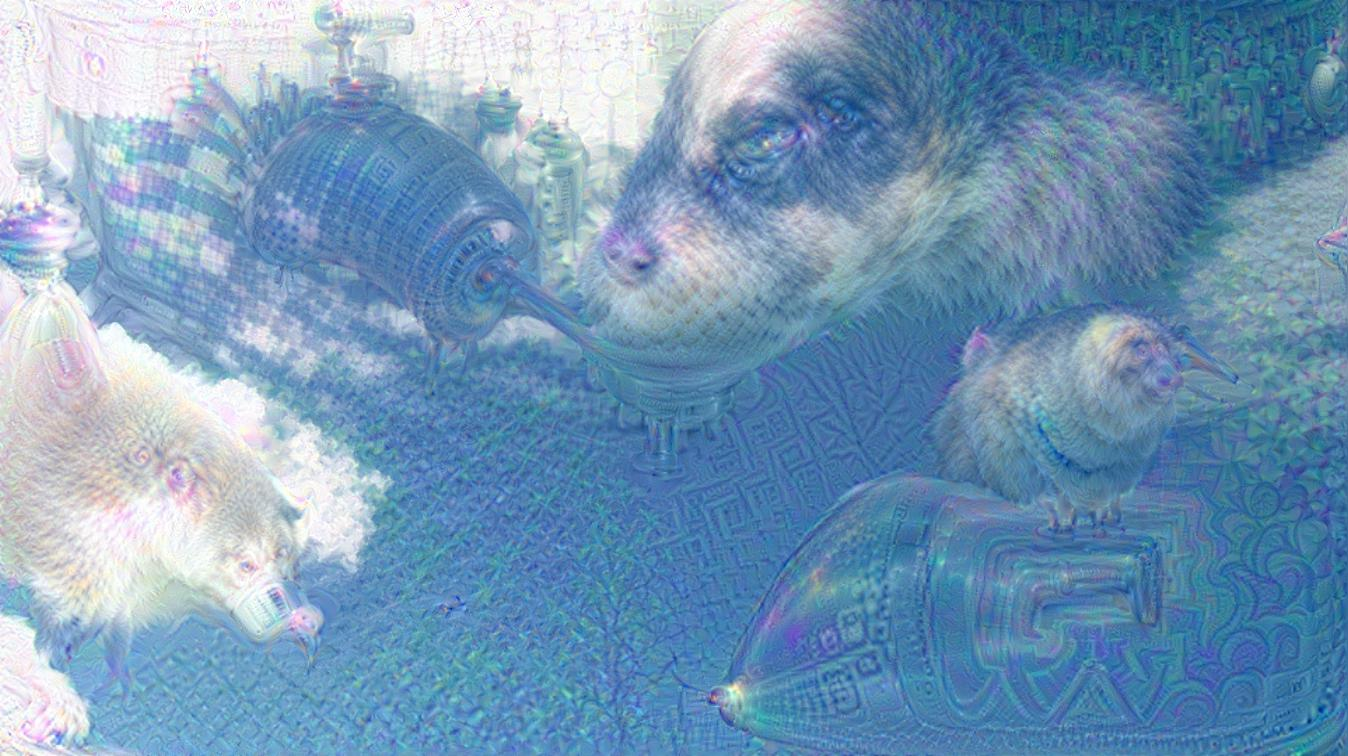

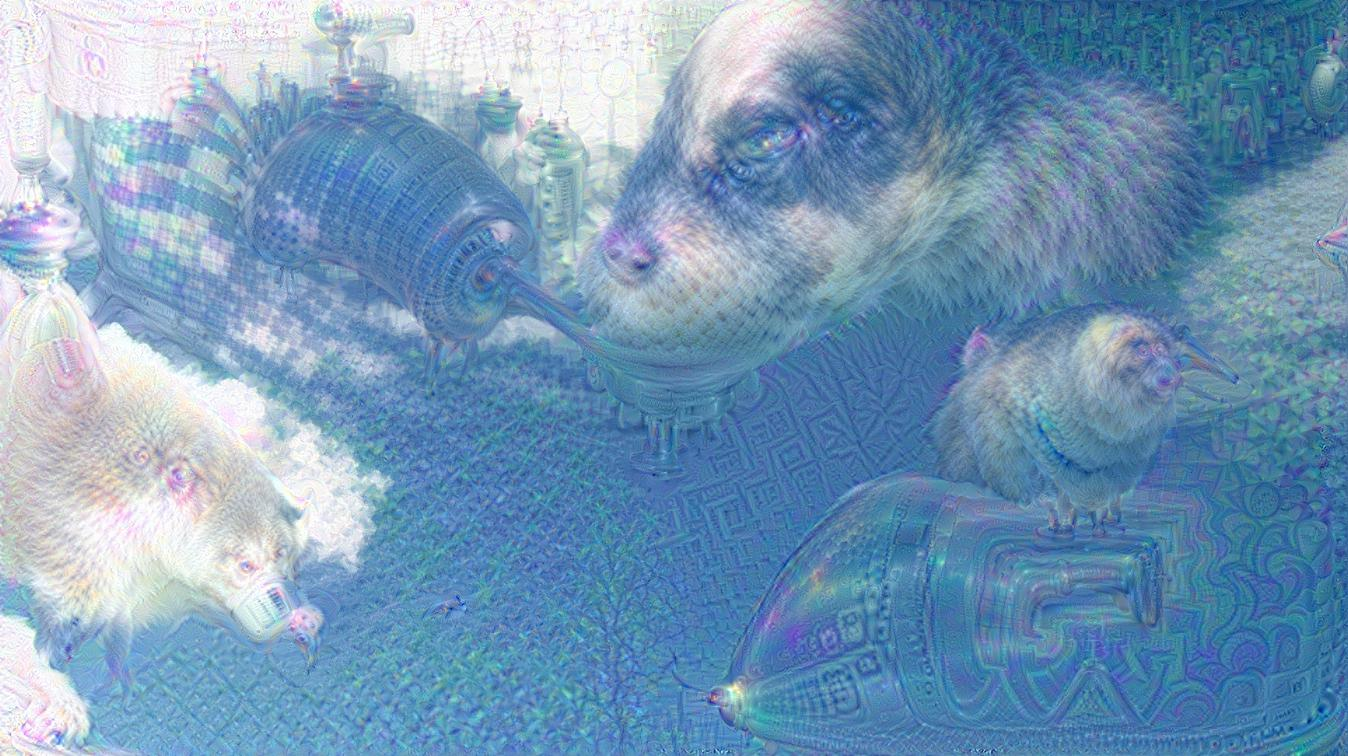

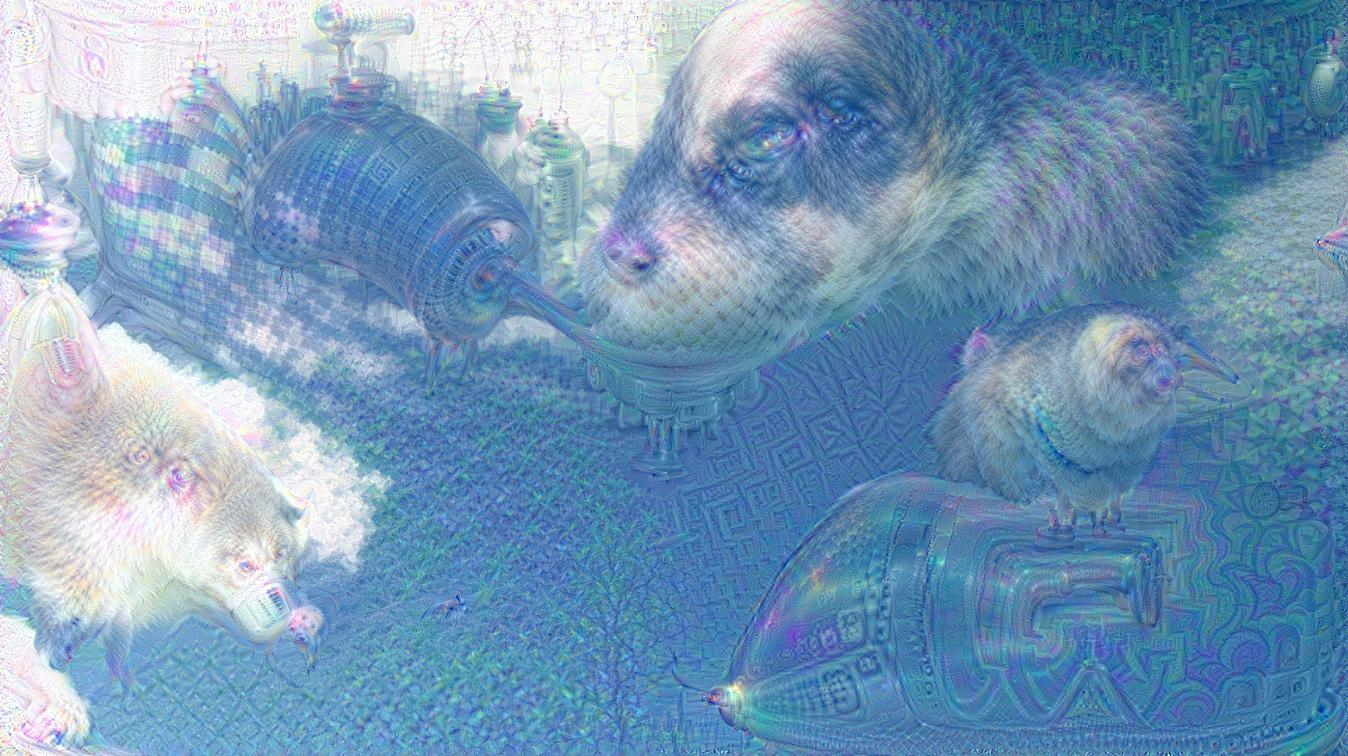

(1, 3, 1059, 1887)
3


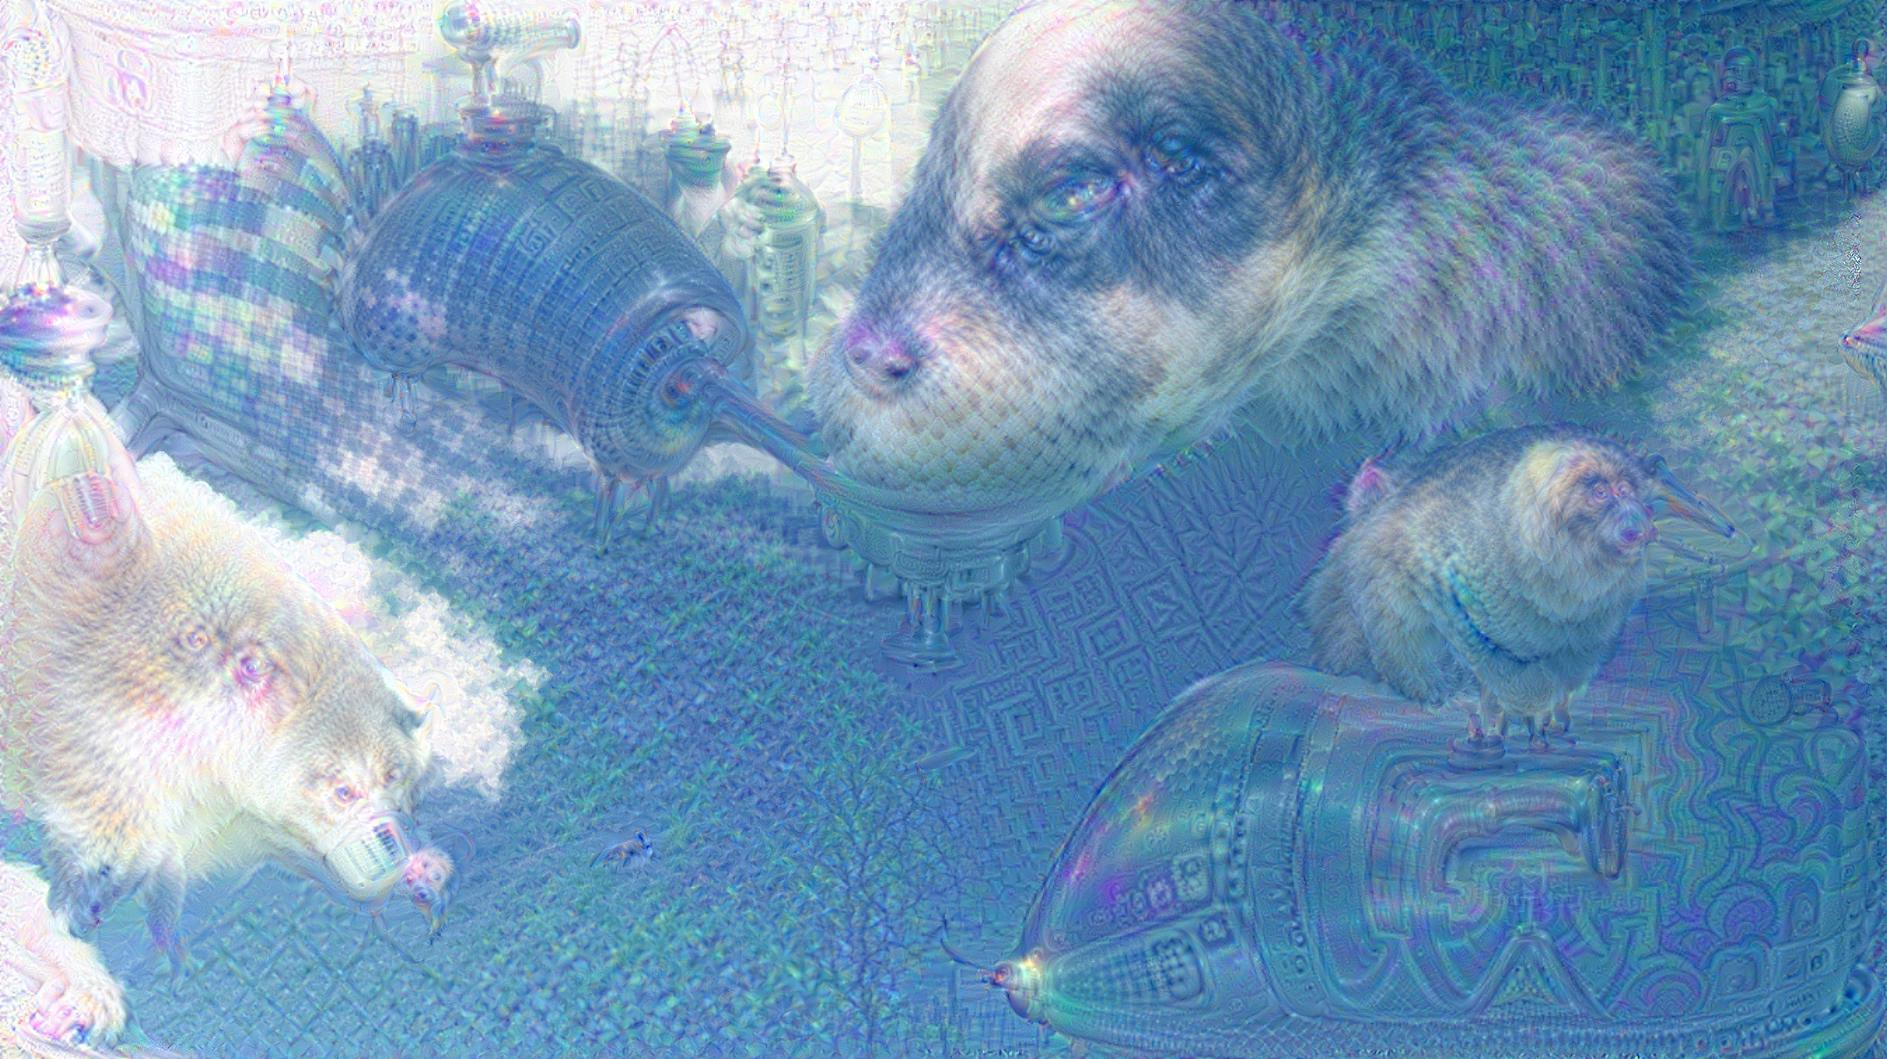

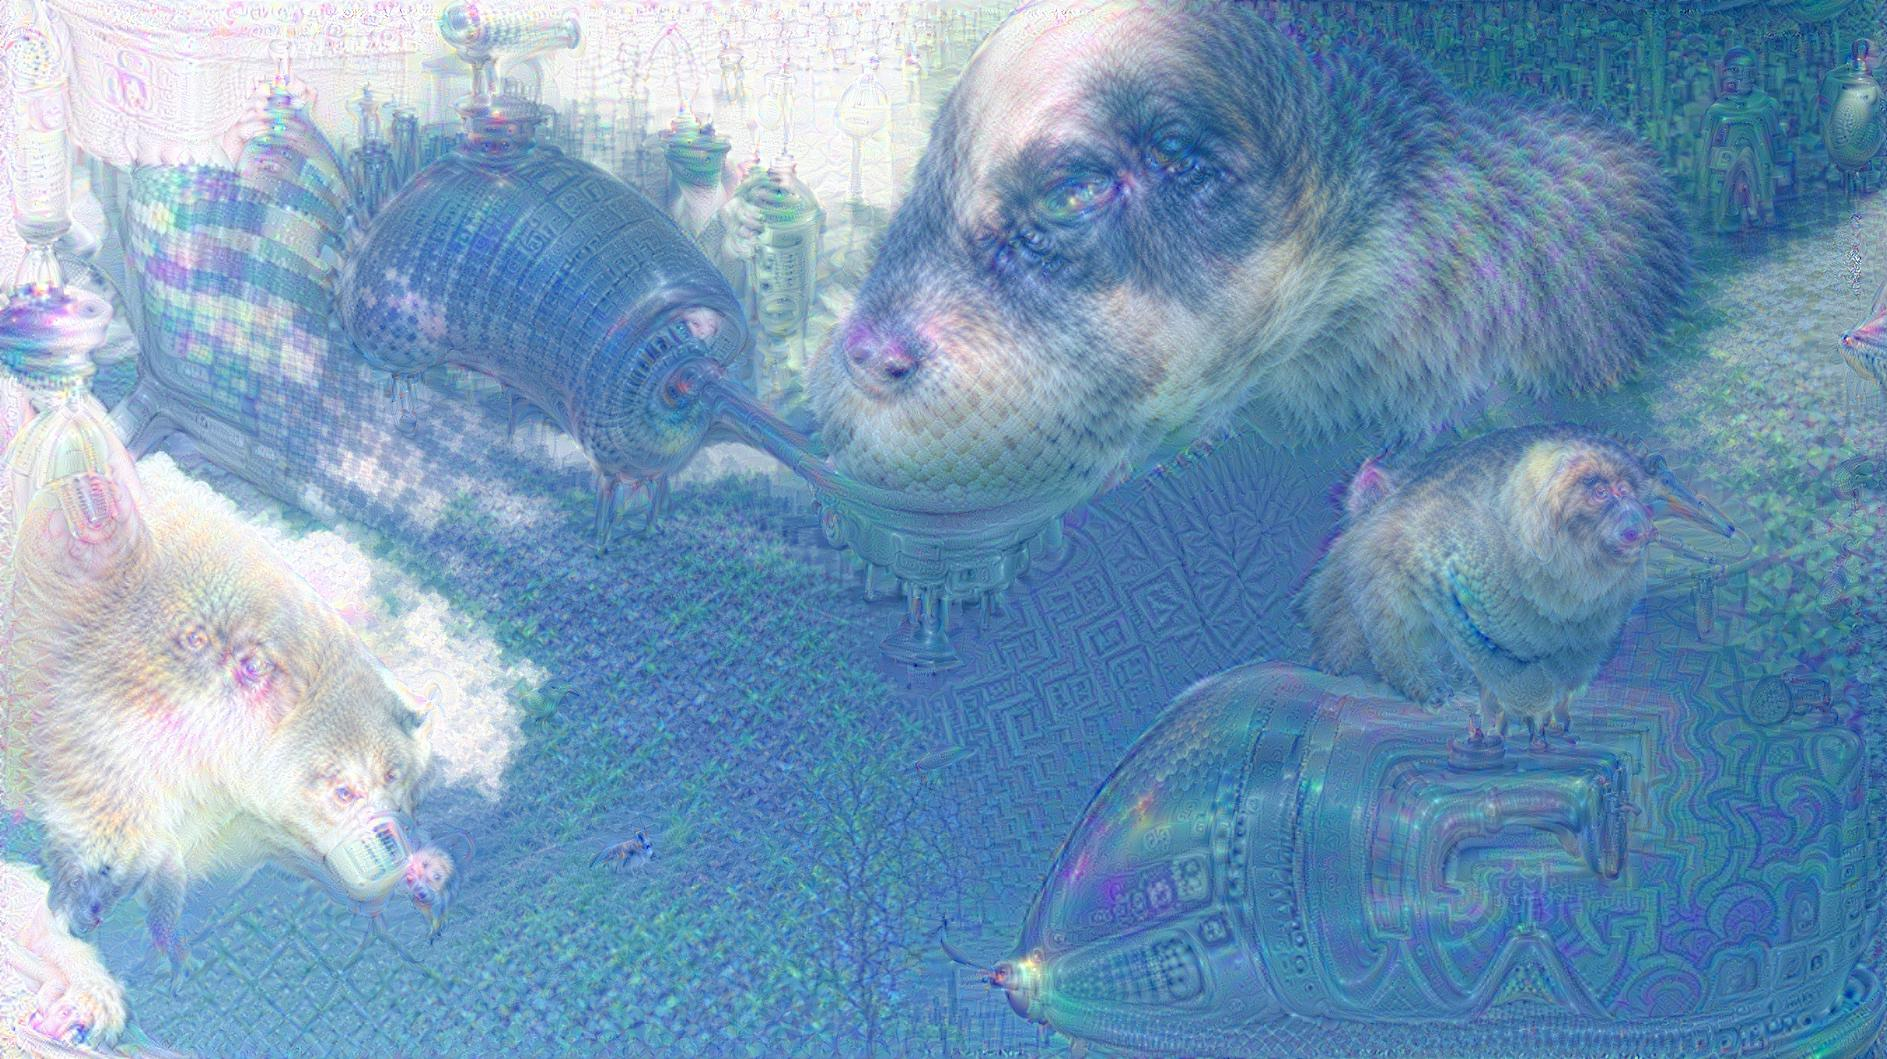

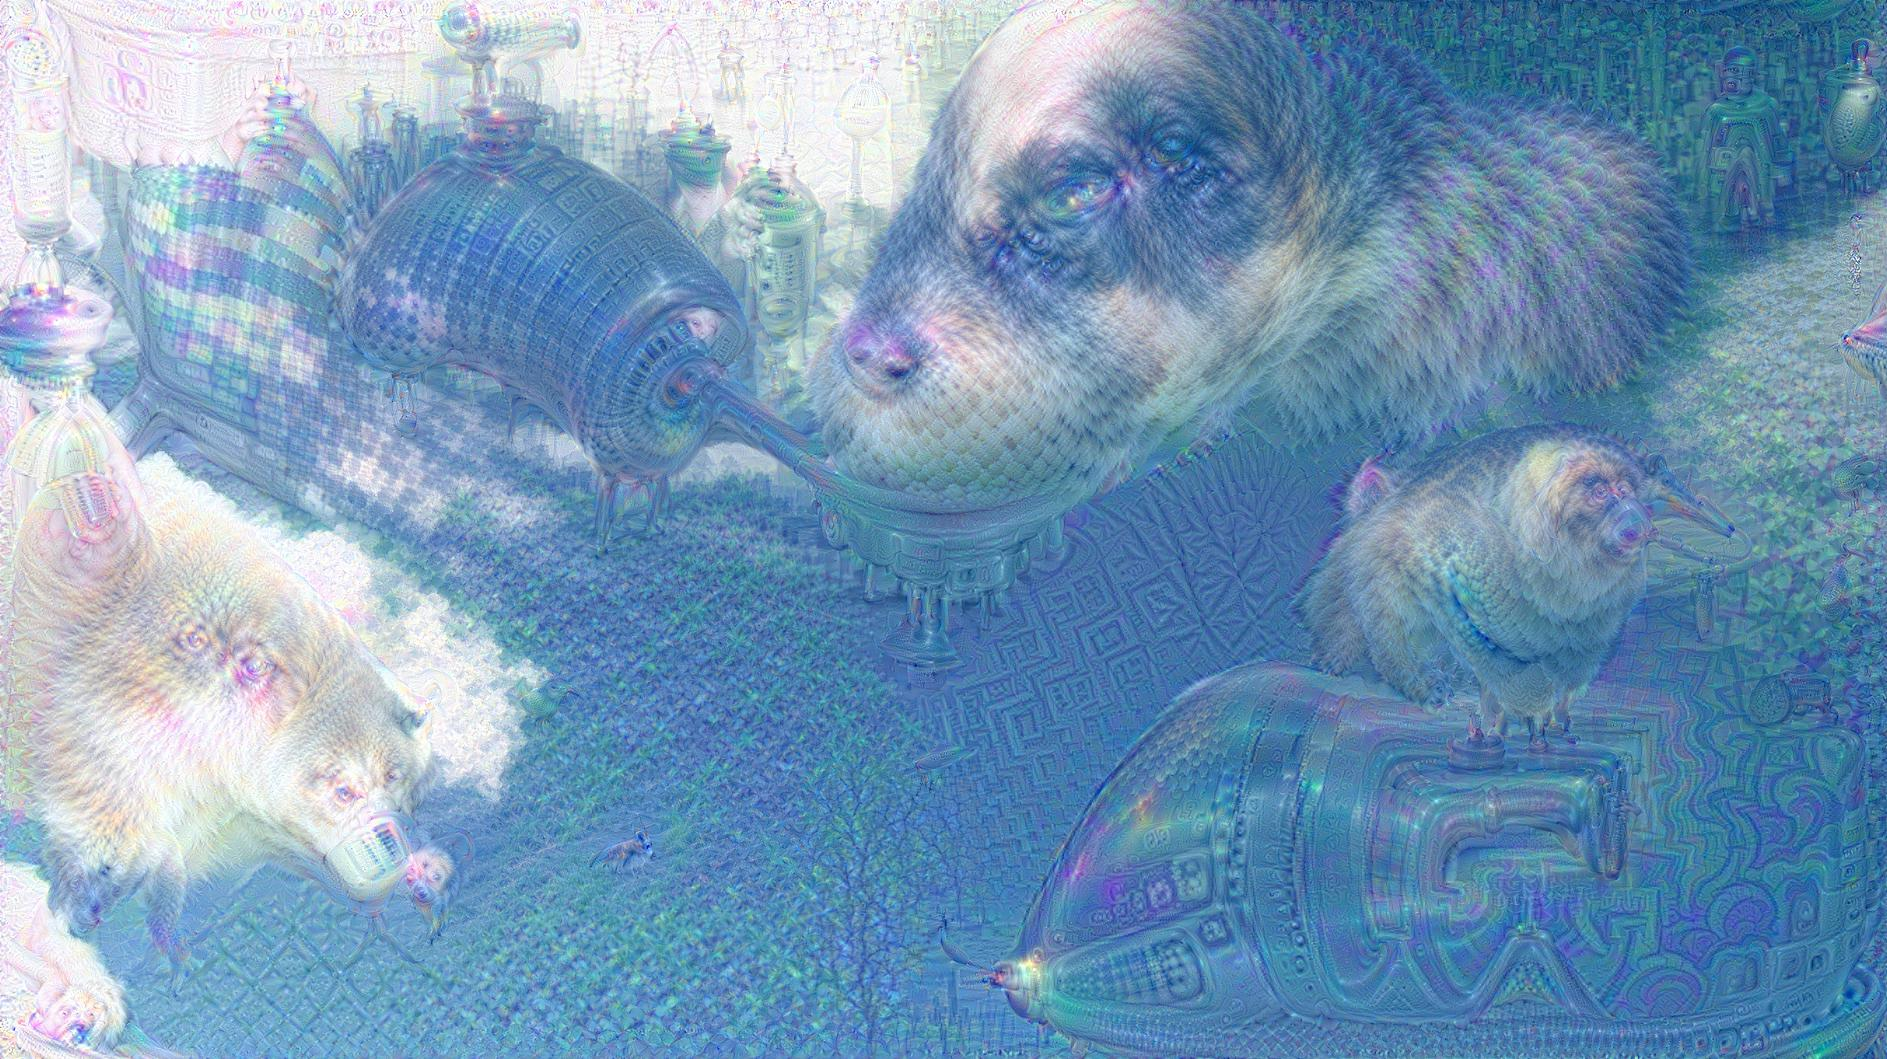

In [4]:
from deepdream import dream
dream(model, input_np, 
          octave_n=6, 
          num_iterations=20, 
          lr=2e-2,
          max_jitter=32,
          show_every=10,
          end_layer=3)